In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.tree import plot_tree

c:\Users\pedro\miniconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Carregando os dados

In [2]:
df = pd.read_csv("planilha-fabio.csv", delimiter=";")

In [3]:
df

,Sport,TotPkts,TotBytes,SrcPkts,DstPkts,SrcBytes,DstBytes,Target
0,143,2,180,2,0,180,0,0
1,68,2,684,2,0,684,0,0
2,0,1,60,1,0,60,0,0
3,54949,10,628,4,6,248,380,0
4,54943,8,496,4,4,248,248,0
...,...,...,...,...,...,...,...,...
1048570,49207,18,1152,10,8,644,508,0
1048571,49208,18,1152,10,8,644,508,0
1048572,49209,18,1152,10,8,644,508,0
1048573,49210,18,1152,10,8,644,508,0


In [4]:
df["Target"].value_counts()

0    721827
1    326748
Name: Target, dtype: int64

<AxesSubplot:>

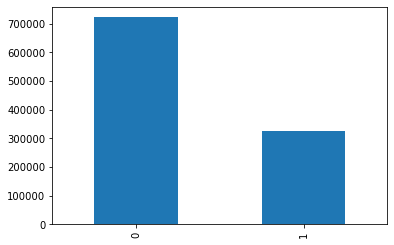

In [5]:
df["Target"].value_counts().plot(kind="bar")

In [6]:
df.columns

Index(['Sport', 'TotPkts', 'TotBytes', 'SrcPkts', 'DstPkts', 'SrcBytes',
       'DstBytes', 'Target'],
      dtype='object')

In [7]:
X = df[['SrcPkts', 'DstPkts', 'SrcBytes', 'DstBytes']]
y = df[["Target"]]

___

### Algoritmos testados

In [8]:
models = {
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", seed=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression()),
    "Support Vector Machine": make_pipeline(StandardScaler(), LinearSVC())
}

### Executando a Validação Cruzada

In [9]:
scoring = ["accuracy", "precision", "recall", "f1"]
cv = 5

In [10]:
results = []

for algorithm, classifier in models.items():
    scores = cross_validate(classifier, X, y, cv=cv, scoring=scoring)
    df_scores = pd.DataFrame(scores)
    df_scores["algorithm"] = algorithm

    results.append(df_scores)

df_results = pd.concat(results)

c:\Users\pedro\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\pedro\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\pedro\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\pedro\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

### Resultados da Validação Cruzada

In [11]:
df_results.groupby("algorithm").mean()

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
algorithm,,,,,,
Decision Tree,0.324999,0.330200,0.997917,0.994911,0.998430,0.996663
Logistic Regression,4.679790,0.353804,0.994708,0.984757,0.998482,0.991568
Support Vector Machine,8.185200,0.354202,0.995946,0.988628,0.998482,0.993526
XGBoost,11.444996,0.459205,0.997720,0.994291,0.998430,0.996349


<AxesSubplot:xlabel='fit_time', ylabel='algorithm'>

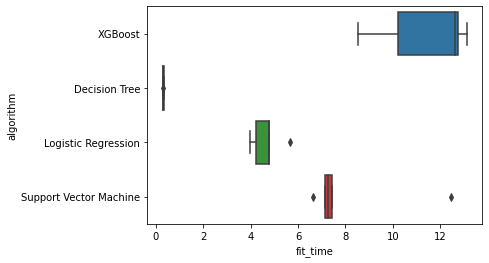

In [12]:
sns.boxplot(data=df_results, y="algorithm", x="fit_time")

<AxesSubplot:xlabel='score_time', ylabel='algorithm'>

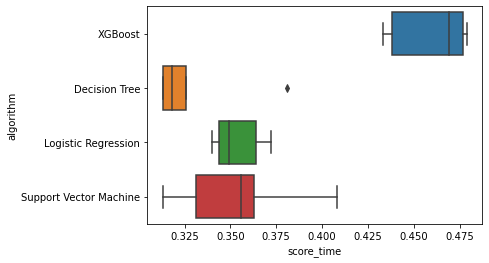

In [13]:
sns.boxplot(data=df_results, y="algorithm", x="score_time")

<AxesSubplot:xlabel='test_accuracy', ylabel='algorithm'>

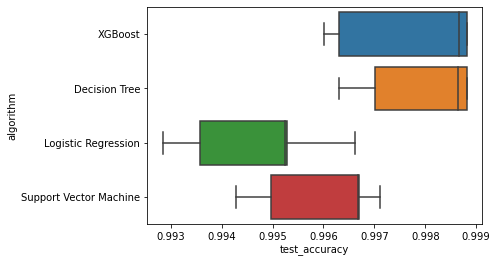

In [14]:
sns.boxplot(data=df_results, y="algorithm", x="test_accuracy")

<AxesSubplot:xlabel='test_precision', ylabel='algorithm'>

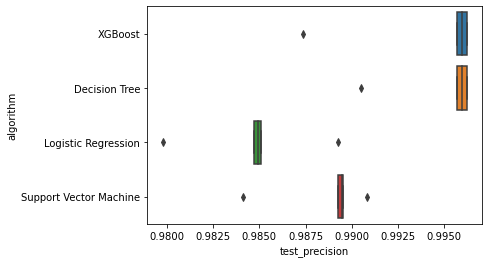

In [15]:
sns.boxplot(data=df_results, y="algorithm", x="test_precision")

<AxesSubplot:xlabel='test_recall', ylabel='algorithm'>

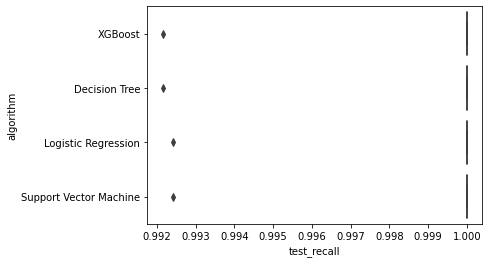

In [16]:
sns.boxplot(data=df_results, y="algorithm", x="test_recall")

<AxesSubplot:xlabel='test_f1', ylabel='algorithm'>

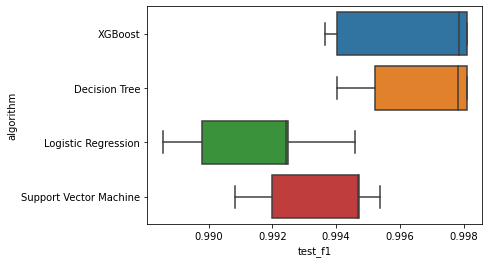

In [17]:
sns.boxplot(data=df_results, y="algorithm", x="test_f1")

___

### Treinando o modelo com todo o dataset

In [18]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

DecisionTreeClassifier(random_state=42)

In [19]:
# ['SrcPkts', 'DstPkts', 'SrcBytes', 'DstBytes']
sample = [10, 8, 644, 508]

In [20]:
clf.predict([sample])

array([0], dtype=int64)

In [21]:
if clf.predict([sample])[0] == 0:
    print("Normal")
else:
    print("Ataque")

Normal


___

### Plotando a Árvore de Decisão

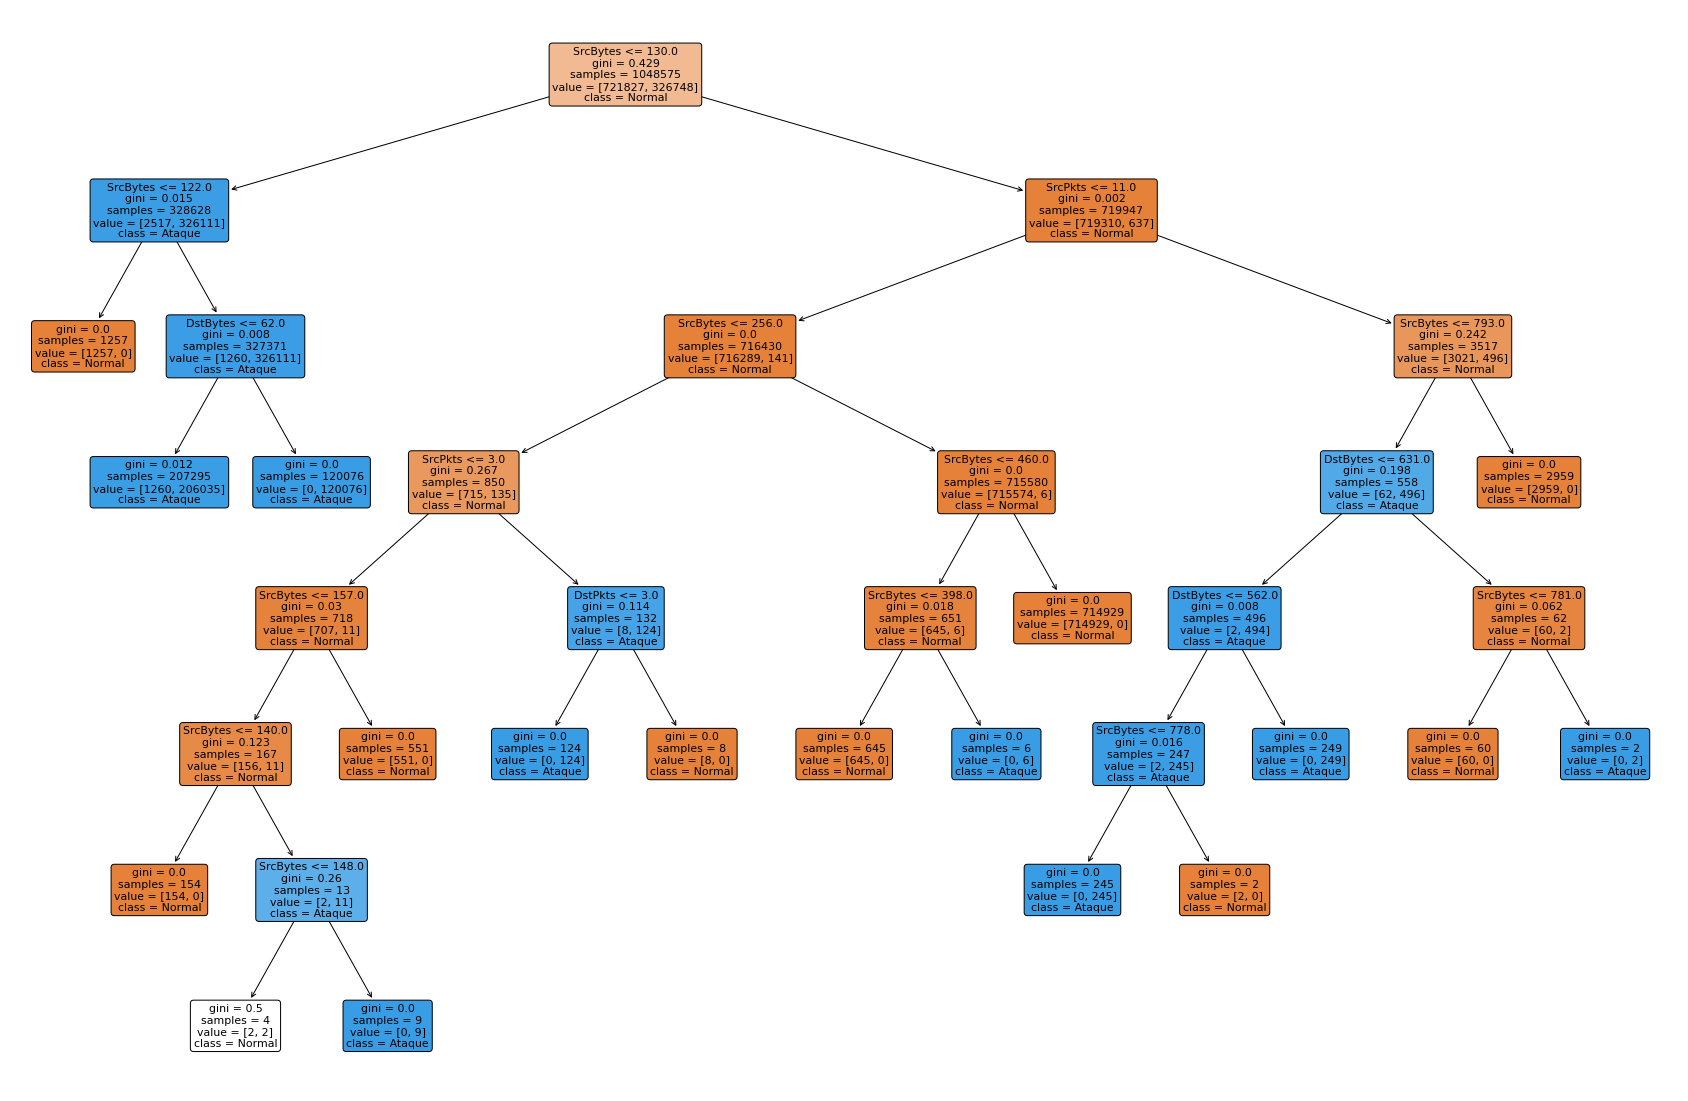

In [26]:
plt.figure(figsize=(30,20))
plot_tree(clf, feature_names= X.columns, filled=True, rounded=True, class_names=["Normal", "Ataque"])
plt.savefig("decision_tree.pdf")